<a href="https://colab.research.google.com/github/Monikacg/Signal-Manipulation/blob/master/gr_work1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Syntetic signal analysis 

In [ ]:
# Make plots appear inline, set custom plotting style
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack
from tftb.generators import amgauss, fmlin
from tftb.processing import WignerVilleDistribution

## Create signal

<Figure size 432x288 with 0 Axes>

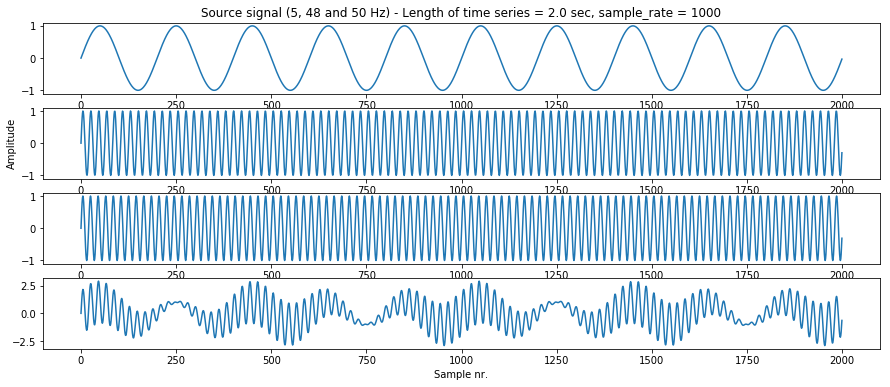

In [ ]:
f_s = 1000 # Sampling rate (measurements/sec)
signal_length = 2

f1 = 5
f2 = 48
f3 = 50

t = np.linspace(0, signal_length, 2*f_s, endpoint = False)
x1 = np.sin(f1* 2 * np.pi*  t)
x2 = np.sin(f2* 2 * np.pi*  t)
x3 = np.sin(f3* 2 * np.pi*  t)

# Compose signal 
x = x1 + x2 + x3

plt.figure(1)
plt.figure(figsize=(15,6))
plt.subplot(411)
plt.plot(x1)
plt.title("Source signal (5, 48 and 50 Hz) - Length of time series = {} sec, sample_rate = {}".format(len(x)/f_s, f_s))

plt.subplot(412)
plt.plot(x2)
plt.ylabel("Amplitude")

plt.subplot(413)
plt.plot(x3)

plt.subplot(414)
plt.plot(x)
plt.xlabel("Sample nr.")
plt.show()


## Apply DFT

In [ ]:
X = fftpack.fft(x)

freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 60)
ax.set_ylim(-50, 1100)

# Add noise to signal

In [ ]:
import numpy as np
import random

sample = 2000
x1 = np.arange(sample)
noise = 0.01*np.asarray(random.sample(range(0,2000),sample))
 
y = x+noise

plt.plot(x1, y)
plt.title("Signal with noise")
plt.xlabel("Sample nr.")
plt.ylabel("Amplitude")
plt.show()

In [ ]:
X = fftpack.fft(y)
freqs = fftpack.fftfreq(len(y)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, np.abs(X))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(0, 55)
ax.set_ylim(-5, 1200)

# Hilbert Transform (HT)


In [ ]:
from scipy.fftpack import fft,ifft
from scipy.signal import hilbert, chirp

signal = x
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))

instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * f_s)

fig = plt.figure()

ax0 = fig.add_subplot(211)
ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(-200, 150.0)

ax = plt.subplot(111, projection='polar')
ax.plot(instantaneous_phase, amplitude_envelope)
ax.set_rmax(5)
ax.set_rticks([])
ax.grid(True)


## STFT

In [ ]:

#scipy.signal.stft

from scipy.fftpack import fft,ifft
from scipy.signal import hilbert, chirp, stft 

signal = x
analytic_signal = hilbert(signal)
amplitude_envelope = np.abs(analytic_signal)

instantaneous_phase = np.unwrap(np.angle(analytic_signal))

instantaneous_frequency = (np.diff(instantaneous_phase) /
                           (2.0*np.pi) * f_s)

fig = plt.figure()

ax0 = fig.add_subplot(211)

ax0.plot(t, signal, label='signal')
ax0.plot(t, amplitude_envelope, label='envelope')
ax0.set_xlabel("time in seconds")
ax0.legend()

ax1 = fig.add_subplot(212)
ax1.plot(t[1:], instantaneous_frequency)
ax1.set_xlabel("time in seconds")
ax1.set_ylim(-200, 150.0)

In [ ]:
# WVD - same as in Example 1 from lecture

In [ ]:
from tftb.generators import amgauss, fmlin
import matplotlib.pyplot as plt
import numpy as np

n_points = 2000
fmin, fmax = 0.0, 1

z = x

plt.plot(np.real(z))
plt.title("Linear Frequency Modulation")
plt.show()


dsp1 = np.fft.fftshift(np.abs(np.fft.fft(z)) ** 2)

plt.plot(np.arange(-1000, 1000, dtype=float) / 300, dsp1)
plt.xlim(-0.5, 0.5)
plt.title('Spectrum')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

from tftb.processing import WignerVilleDistribution

wvd = WignerVilleDistribution(z)
wvd.run()
wvd.plot(kind='contour', extent=[0, n_points, fmin, fmax])

In [ ]:
from tftb.generators import sigmerge, noisecg
noisy_signal = sigmerge(z, noisecg(2000), 0)
plt.plot(np.real(noisy_signal))
plt.xlim(0, 2000)
plt.title('Noisy signal')
plt.ylabel('Real Part')
plt.xlabel('Time')
plt.grid()
plt.show()

In [ ]:
dsp1 = np.fft.fftshift(np.abs(np.fft.fft(noisy_signal)) ** 2)
plt.plot(np.arange(-1000, 1000, dtype=float) / 2000, dsp1)
plt.xlim(-0.05, 0.5)
plt.title('Spectrum of Noisy Signal')
plt.ylabel('Squared modulus')
plt.xlabel('Normalized Frequency')
plt.grid()
plt.show()

In [ ]:
wvd = WignerVilleDistribution(noisy_signal)
wvd.run()
wvd.plot(kind='contour')

In [ ]:
# Energy spectrum of the signal
from tftb.generators import amexpos, fmconst, sigmerge, noisecg

# Generate a noisy transient signal.
transsig = amexpos(64, kind='unilateral') * fmconst(64)[0]
signal = np.hstack((np.zeros((100,)), transsig, np.zeros((92,))))
signal = sigmerge(signal, noisecg(256), -5)

fig, ax = plt.subplots(2, 1)
ax1, ax2 = ax
ax1.plot(np.real(signal))
ax1.grid()
ax1.set_title('Noisy Transient Signal')
ax1.set_xlabel('Time')
ax1.set_xlim((0, 256))
ax1.set_ylim((np.real(signal).max(), np.real(signal.min())))


signal = x

dsp = np.fft.fftshift(np.abs(np.fft.fft(signal)) ** 2)

ax2.plot(np.arange(-1000, 1000, dtype=float) / 4000, dsp)
ax2.set_title('Energy spectrum of noisy transient signal')
ax2.set_xlabel('Normalized frequency')
ax2.grid()
ax2.set_xlim(-0.5, 0.5)

plt.subplots_adjust(hspace=0.5)

plt.show()